In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import random
import statistics
import seaborn as sns 
import collections
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

### The Least Squares Assumptions 

$Y_i = \beta_0 + \beta_1X_i+u_i$ , $i = 1, ..., n,$

1. The error term $u_i$ has conditional mean zero given $X_i.$ Which means $E(u_i|X_i)=0$


In [87]:
u = []
for i in range(1000):
    conditional_u = np.random.normal(0,1, size = 100)
    u.append(conditional_u.tolist())
    
flat_u = [] 
for i in u:
    flat_u.extend(i)

This is how $u_i$ looks like given $X_i$. 

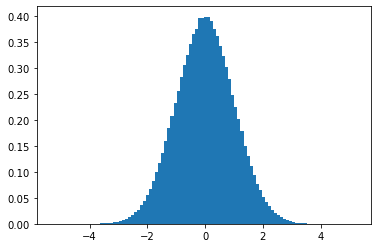

In [100]:
plt.hist(np.random.normal(0,1,size=1000000), bins=100, density=True)
plt.show()

And this is how $u_i$ looks like. 

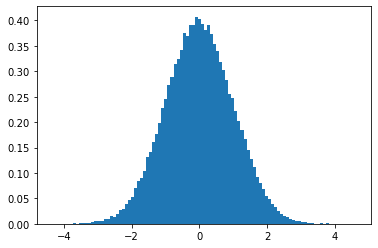

In [99]:
plt.hist(flat_u, bins=100, density=True)
plt.show()

2. $(X_i,Y_i)$, $i=1,...,n,$ are independent and identically distributed (i.i.d) draws from their joint distribution. 

$Y_i = \beta_0 + \beta_1X_i+u_i$

For $X_i$, each $X_i$ is drawn from different distributions. But all these different distributions look the same. This condtion comes from the statement of IID. From IID, there is a statement where it says X_i are identically distributed. 

It means the distribution of $X_1$, $X_2$, $X_3$ and so on look the same. 



So on the codes below, I have created 10000 distributions that look the same. These distributions look normal with mean 0 and std of 1. And for each distribution, I have taken one value from each distribution. And I plotted the histogram of the values I have collected. Interestingly enough, the resulting plot had normal distribution with mean 0 and std of 1. 

In [50]:
%%time
dist_size = 5000


X = [] 
for i in range(10000):
    distribution = np.random.normal(0,1, size=dist_size)
    inx = np.random.randint(0,dist_size, size=1)
    X_i = distribution[inx]
    X.append(X_i[0])

Wall time: 1.64 s


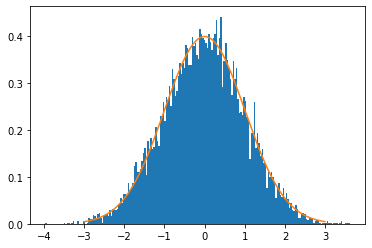

In [51]:
x = np.arange(-3, 3, 0.01)
plt.hist(X, bins=200, density=True)
plt.plot(x, stats.norm.pdf(x,0,1))
plt.show()

For this time, I have tried another approach. This time, I intentionally made each distribution look different. Each distribution had different mean. 

In [52]:
%%time
dist_size = 5000


X = [] 
for i in range(10000):
    distribution = np.random.normal(0+(0.001*i),1, size=dist_size)
    inx = np.random.randint(0,dist_size, size=1)
    X_i = distribution[inx]
    X.append(X_i[0])

Wall time: 1.71 s


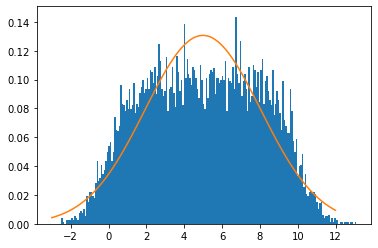

In [56]:
x = np.arange(-3, 12, 0.01)
plt.hist(X, bins=200, density=True)
plt.plot(x, stats.norm.pdf(x,np.mean(X),np.std(X)))
plt.show()

This time, let me change the std for each distribution.

In [57]:
%%time
dist_size = 5000

X = [] 
for i in range(10000):
    distribution = np.random.normal(0,1*(0.001*i), size=dist_size)
    inx = np.random.randint(0,dist_size, size=1)
    X_i = distribution[inx]
    X.append(X_i[0])

Wall time: 1.7 s


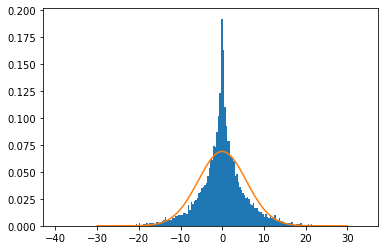

In [59]:
x = np.arange(-30, 30, 0.01)
plt.hist(X, bins=200, density=True)
plt.plot(x, stats.norm.pdf(x,np.mean(X),np.std(X)))
plt.show()

### Side note for myself 

In [112]:
pop_size = 100000
pop = np.random.normal(0,1,size=pop_size)

In [113]:
def cal_mean_list(sample_size):
    mean_list = []
    for i in range(10000):
        inx = np.random.randint(0,pop_size, size=sample_size)
        sample = pop[inx]
        sample_mean = np.mean(sample)
        mean_list.append(sample_mean)
    return mean_list

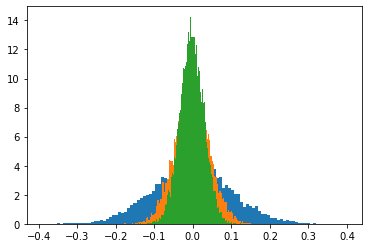

In [118]:
plt.hist(cal_mean_list(100), bins=100, density=True)
plt.hist(cal_mean_list(500), bins=100, density=True)
plt.hist(cal_mean_list(1000), bins=100, density=True)
plt.show()

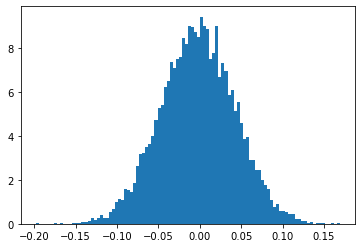

In [115]:
plt.hist(cal_mean_list(500), bins=100, density=True)
plt.show()

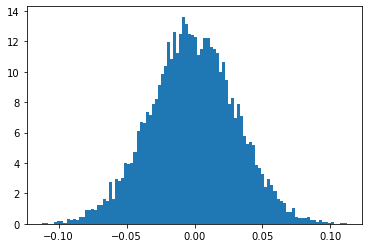

In [116]:
plt.hist(cal_mean_list(1000), bins=100, density=True)
plt.show()

### Another Side note for myself (about BLUE) 

In [162]:
np.random.seed(0)

pop = np.random.normal(0,1, size=10000)

sample_size = 100 

weighted_mean_list = []
mean_list = []
for i in range(10000):
    inx = np.random.randint(0, len(pop), size=sample_size)
    
    weighted_sample = pop[inx]
    sample = pop[inx]
    
    for elem in range(len(weighted_sample)):
        if elem%2 == 0:
            weighted_sample[elem] = weighted_sample[elem]*(1/2)
        else: 
            weighted_sample[elem] = weighted_sample[elem]*(3/2)
            
    
    weighted_sample_mean = np.mean(weighted_sample)
    weighted_mean_list.append(weighted_sample_mean)
    
    sample_mean = np.mean(sample)
    mean_list.append(sample_mean)

In [163]:
print(np.mean(weighted_mean_list))
print(np.var(weighted_mean_list))
print()
print(np.mean(mean_list))
print(np.var(mean_list))

-0.019670359096230574
0.012214406313770895

-0.01940919031181964
0.009785626792011833


In [164]:
np.random.seed(0)

pop = np.random.normal(0,1, size=10000)

sample_size = 1000 

weighted_mean_list = []
mean_list = []
for i in range(10000):
    inx = np.random.randint(0, len(pop), size=sample_size)
    
    weighted_sample = pop[inx]
    sample = pop[inx]
    
    for elem in range(len(weighted_sample)):
        if elem%2 == 0:
            weighted_sample[elem] = weighted_sample[elem]*(1/2)
        else: 
            weighted_sample[elem] = weighted_sample[elem]*(3/2)
            
    
    weighted_sample_mean = np.mean(weighted_sample)
    weighted_mean_list.append(weighted_sample_mean)
    
    sample_mean = np.mean(sample)
    mean_list.append(sample_mean)

In [165]:
print(np.mean(weighted_mean_list))
print(np.var(weighted_mean_list))
print()
print(np.mean(mean_list))
print(np.var(mean_list))

-0.018214057340155385
0.0012229872835962726

-0.018412629747480345
0.0009838989450635127
